<a href="https://colab.research.google.com/github/Nanashi-bot/cdiff_changed/blob/main/amazoneda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import torch

# TAKING AMAZON DATA
with open('/content/train.pkl', 'rb') as f:
    train_data = pickle.load(f)
with open('/content/test.pkl', 'rb') as f:
    test_data = pickle.load(f)
with open('/content/dev.pkl', 'rb') as f:
    dev_data = pickle.load(f)

In [ ]:
train_data['train'][0][-1]['time_since_start']

39.54519553665231

In [ ]:
print(len(train_data['train']))
print(len(test_data['test']))
print(len(dev_data['dev']))

5200
500
300


In [ ]:
# Length of sequences:
seq_lens = []
seq_last_time = []
for i in range(len(train_data['train'])):
  seq_lens.append(len(train_data['train'][i]))
  seq_last_time.append(train_data['train'][i][-1]['time_since_start'])
for i in range(len(test_data['test'])):
  seq_lens.append(len(test_data['test'][i]))
  seq_last_time.append(test_data['test'][i][-1]['time_since_start'])
for i in range(len(dev_data['dev'])):
  seq_lens.append(len(dev_data['dev'][i]))
  seq_last_time.append(dev_data['dev'][i][-1]['time_since_start'])

In [ ]:
len(seq_lens)

6000

In [ ]:
print(max(seq_lens))
print(min(seq_lens))

94
30


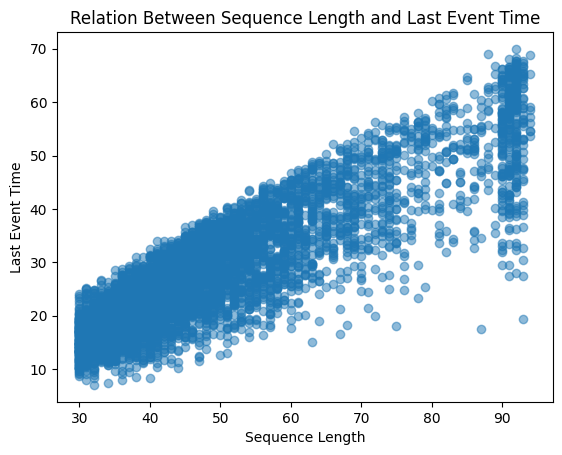

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(seq_lens, seq_last_time, alpha=0.5)
plt.xlabel("Sequence Length")
plt.ylabel("Last Event Time")
plt.title("Relation Between Sequence Length and Last Event Time")
plt.show()

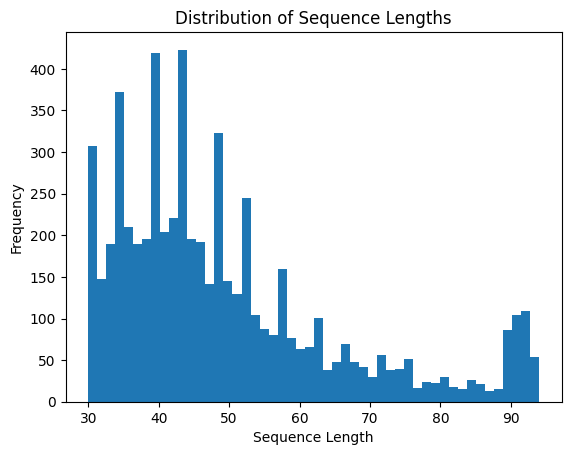

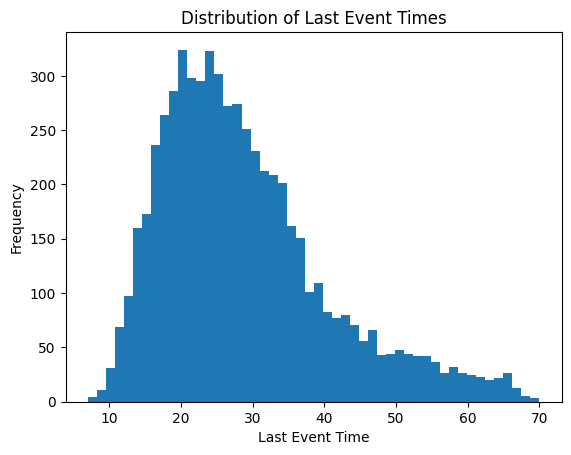

In [ ]:
import matplotlib.pyplot as plt

# Histogram of sequence lengths
plt.hist(seq_lens, bins=50)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Distribution of Sequence Lengths")
plt.show()

# Histogram of last event times
plt.hist(seq_last_time, bins=50)
plt.xlabel("Last Event Time")
plt.ylabel("Frequency")
plt.title("Distribution of Last Event Times")
plt.show()


In [ ]:
import numpy as np

mean = np.mean(seq_lens)
std = np.std(seq_lens)
p95 = np.percentile(seq_lens, 95)

print("Mean:", mean)
print("Standard Deviation:", std)
print("95th Percentile:", p95)

Mean: 49.6335
Standard Deviation: 16.1519816457094
95th Percentile: 90.0


In [ ]:
import numpy as np

mean = np.mean(seq_last_time)
std = np.std(seq_last_time)
p95 = np.percentile(seq_last_time, 95)

print("Mean:", mean)
print("Standard Deviation:", std)
print("95th Percentile:", p95)

Mean: 28.8551437149614
Standard Deviation: 11.731237519758446
95th Percentile: 53.5921334491428


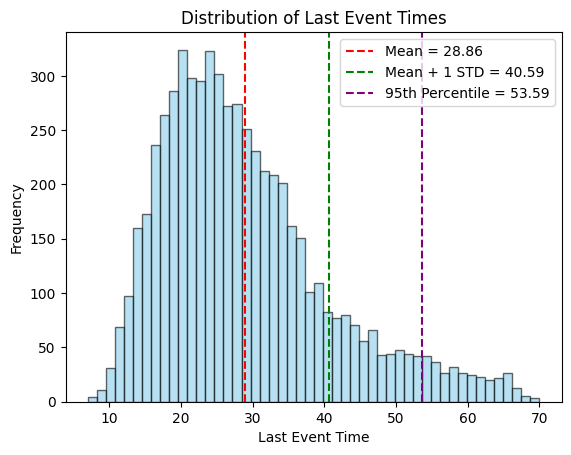

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(seq_last_time, bins=50, alpha=0.6, color='skyblue', edgecolor='black')

mean = np.mean(seq_last_time)
std = np.std(seq_last_time)
p95 = np.percentile(seq_last_time, 95)

plt.axvline(mean, color='red', linestyle='--', label=f'Mean = {mean:.2f}')
plt.axvline(mean + std, color='green', linestyle='--', label=f'Mean + 1 STD = {mean + std:.2f}')
plt.axvline(p95, color='purple', linestyle='--', label=f'95th Percentile = {p95:.2f}')

plt.xlabel("Last Event Time")
plt.ylabel("Frequency")
plt.title("Distribution of Last Event Times")
plt.legend()
plt.show()